# Job analysis - Indeed

### IST652 - Final Project - Jenny&Jieer

## Import the data

In [2]:
import pandas as pd

In [335]:
Data = pd.read_csv('Data.csv')
Business = pd.read_csv('Business.csv')

## Data cleaning - Data.csv

In [336]:
Data[:15]

,Unnamed: 0,Title,Company,Location,Salary,Summary,Link,Description,Job Type
0,0,Data Scientist,"Metron, Inc.","Reston, VA 20190 (Sunset Hills area)",NaN,As a Data Scientist you will be responsible fo...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Job Description:\nOur Advanced Data Analytics ...,NaN
1,1,Senior Data Scientist,TRANZACT,"Fort Lee, NJ 07024","$90,000 - $125,000 a year",Excellent understanding of machine learning te...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,How the Position WorksThe Data Scientist repor...,NaN
2,2,Data Scientist,ClearOne Advantage,"Baltimore, MD 21224 (Canton Industrial Area area)","$70,000 - $80,000 a year",We want to see a passion for machine-learning ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,**Please only local candidates apply - thank y...,NaN
3,3,Machine Learning Engineer,Apple,"Seattle, WA",NaN,"In this highly collaborative role, you will be...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Summary\nPosted: Apr 22, 2020\nRole Number:200...",NaN
4,4,Jr. Data Scientist | Development Team,DarkOwl,"Denver, CO",NaN,Work closely with our lead researchers to writ...,https://www.indeed.com/rc/clk?jk=24a7b392eb383...,What does a Jr. Data Scientist do at DarkOwl?\...,NaN
5,5,Full Time Opportunities for Students or Recent...,Microsoft,"Redmond, WA",NaN,Some experience and or project course work per...,https://www.indeed.com/rc/clk?jk=11baba484db23...,Data Scientists at Microsoft help to improve t...,NaN
6,6,Data Scientist,WTI,"Washington, DC","$90,000 - $115,000 a year","Experience with data aggregation, data visuali...",https://www.indeed.com/company/WTI--Solutions/...,Job Duties: Define data structures for global ...,NaN
7,7,Data Scientist,GNS Healthcare,"Cambridge, MA 02139 (The Port - Area 4 area)",NaN,Headquartered in the biotechnology and health ...,https://www.indeed.com/rc/clk?jk=047077585ab03...,Company Overview\nImagine if we could match pa...,NaN
8,8,Data Scientist,Infotree Global,"Creve Coeur, MO",$50 an hour,Develop powerful business insights from social...,https://www.indeed.com/company/Infotree-Global...,"************** only for W2 candidate, no C2C *...",- Contract
9,9,"Data Scientist, Junior",Booz Allen Hamilton,"McLean, VA 22102",NaN,"Experience with machine learning, data mining,...",https://www.indeed.com/rc/clk?jk=9916a0ab36f9a...,The Challenge:\nAre you excited at the prospec...,NaN


In [337]:
Data.dtypes

Unnamed: 0      int64
Title          object
Company        object
Location       object
Salary         object
Summary        object
Link           object
Description    object
Job Type       object
dtype: object

<b>Drop unneccessary columns

In [338]:
Data = Data.drop(['Unnamed: 0'],axis=1)

<b>Extract the state from location column

In [339]:
# Unified the NaN cells' type
Data['Location'] = Data['Location'].fillna('None')

<b>Check if there is None in location column.

In [340]:
(Data['Location'] == 'None').any()

False

In [341]:
state = []

# Find the state abbreviation in the location column.
# If the location is remote, it remains remotre
# If it has a detailed location, split them by comma, and extract the state name, which is at the second and third position
# Store the state information into a new list, and convert it into a pandas dataframe, then merge with the raw dataframe

for loc in Data['Location']:
    try:
        state.append(loc.split(',')[1].strip()[:2])
    except:
        state.append('Remote')

state = pd.DataFrame(state,columns=['State'])
Data = pd.concat([Data,state],axis=1)
Data

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State
0,Data Scientist,"Metron, Inc.","Reston, VA 20190 (Sunset Hills area)",NaN,As a Data Scientist you will be responsible fo...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Job Description:\nOur Advanced Data Analytics ...,NaN,VA
1,Senior Data Scientist,TRANZACT,"Fort Lee, NJ 07024","$90,000 - $125,000 a year",Excellent understanding of machine learning te...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,How the Position WorksThe Data Scientist repor...,NaN,NJ
2,Data Scientist,ClearOne Advantage,"Baltimore, MD 21224 (Canton Industrial Area area)","$70,000 - $80,000 a year",We want to see a passion for machine-learning ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,**Please only local candidates apply - thank y...,NaN,MD
3,Machine Learning Engineer,Apple,"Seattle, WA",NaN,"In this highly collaborative role, you will be...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Summary\nPosted: Apr 22, 2020\nRole Number:200...",NaN,WA
4,Jr. Data Scientist | Development Team,DarkOwl,"Denver, CO",NaN,Work closely with our lead researchers to writ...,https://www.indeed.com/rc/clk?jk=24a7b392eb383...,What does a Jr. Data Scientist do at DarkOwl?\...,NaN,CO
...,...,...,...,...,...,...,...,...,...
1305,Senior Data Scientist,Humana,"Louisville, KY",NaN,Build smart systems that learn from health int...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Description\nThe Senior Data Scientist uses ma...,NaN,KY
1306,Data Scientist,Seen by Indeed,"Washington, DC",NaN,With one application you can be considered for...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,With one application you can be considered for...,NaN,DC
1307,Data Scientist / Data Analytics,Tredence Inc.,"Seattle, WA","$100,000 - $130,000 a year",Data analytics: 3 years (Preferred).\nLead and...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Hi,Hope you are doing well.**This is Nasim Sha...",NaN,WA
1308,Clinical Data Scientist - Clinical Data Manage...,UTMB,"Galveston, TX 77550","$101,231 a year",Five years of clinical analytics experience in...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Min Qualifications\n\nEDUCATION & EXPERIENCE\n...,NaN,TX


<b>Convert the details in 'Description' column to lower case, so that when we do the text analysis, it will not affect the analysis because of case sensitive.

In [342]:
Data['Description'] = Data['Description'].str.lower()

In [343]:
Data.head()

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State
0,Data Scientist,"Metron, Inc.","Reston, VA 20190 (Sunset Hills area)",NaN,As a Data Scientist you will be responsible fo...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job description:\nour advanced data analytics ...,NaN,VA
1,Senior Data Scientist,TRANZACT,"Fort Lee, NJ 07024","$90,000 - $125,000 a year",Excellent understanding of machine learning te...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,how the position worksthe data scientist repor...,NaN,NJ
2,Data Scientist,ClearOne Advantage,"Baltimore, MD 21224 (Canton Industrial Area area)","$70,000 - $80,000 a year",We want to see a passion for machine-learning ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,**please only local candidates apply - thank y...,NaN,MD
3,Machine Learning Engineer,Apple,"Seattle, WA",NaN,"In this highly collaborative role, you will be...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"summary\nposted: apr 22, 2020\nrole number:200...",NaN,WA
4,Jr. Data Scientist | Development Team,DarkOwl,"Denver, CO",NaN,Work closely with our lead researchers to writ...,https://www.indeed.com/rc/clk?jk=24a7b392eb383...,what does a jr. data scientist do at darkowl?\...,NaN,CO


## Data cleaning - Business.csv

In [344]:
Business.dtypes

Unnamed: 0      int64
Title          object
Company        object
Location       object
Salary         object
Summary        object
Link           object
Description    object
Job Type       object
dtype: object

In [345]:
Business = Business.drop(['Unnamed: 0'],axis=1)

In [346]:
Business['Location'] = Business['Location'].fillna('None')

In [347]:
(Data['Location'] == 'None').any()

False

In [348]:
state = []

for loc in Business['Location']:
    try:
        state.append(loc.split(',')[1].strip()[:2])
    except:
        state.append('Remote')

state = pd.DataFrame(state,columns=['State'])
Business = pd.concat([Business,state],axis=1)
Business

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State
0,Manager of Business Intelligence,Kansas City Southern Railway,"Kansas City, MO",NaN,Establishes and maintains communication with b...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Job Summary:\n\nThe primary responsibility of ...,NaN,MO
1,Business Intelligence Developer,APG Federal Credit Union,"Edgewood, MD",NaN,"Designing, developing and maintaining business...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,APGFCU – Your Community Credit Union! For over...,NaN,MD
2,Business Intelligence Developer,Jobot,"Greenwood Village, CO","$90,000 - $115,000 a year",Competitive base salary between $90k and $110k...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Established Regional Real Estate Leader Seeks ...,NaN,CO
3,Business Intelligence and Commissions Speciali...,Isagenix,"Gilbert, AZ 85297",NaN,Work with business owners to interpret data an...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Position Summary:\nThe specialist manages supp...,NaN,AZ
4,Business Intelligence Developer,"MasterBrand Cabinets, Inc.","Jasper, IN 47546",NaN,Identify recommend and prioritize new business...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Position Profile:\nPosition Summary\nThis is a...,NaN,IN
...,...,...,...,...,...,...,...,...,...
1284,Credit Data Business Analyst,Southern Management Corporation,"Greenville, SC 29601",NaN,The Credit Data Business Analyst at Southern M...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Overview:\nSummary:\nThe Credit Data Business ...,NaN,SC
1285,Business Analyst,Enovational,"Washington, DC 20005 (Downtown area)","$60,000 - $130,000 a year",Our ideal candidate is has earned a bachelor’s...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Enovational Corp is a fast growing technology ...,NaN,DC
1286,Jr. Business Analyst,First Notch Technology,"Nyack, NY","$50,000 - $60,000 a year",As a Business Analyst based in Halifax you are...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,ROLEAs a Business Analyst based in Halifax you...,"- Part-time, Contract",NY
1287,Business Analyst,Cognosante,"Fargo, ND 58103 (Village West area)",NaN,The Business Analyst will be a part of a team ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Business Analyst will be a part of a team ...,NaN,ND


In [349]:
Business['Description'] = Business['Description'].str.lower()

In [350]:
Business.head()

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State
0,Manager of Business Intelligence,Kansas City Southern Railway,"Kansas City, MO",NaN,Establishes and maintains communication with b...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job summary:\n\nthe primary responsibility of ...,NaN,MO
1,Business Intelligence Developer,APG Federal Credit Union,"Edgewood, MD",NaN,"Designing, developing and maintaining business...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,apgfcu – your community credit union! for over...,NaN,MD
2,Business Intelligence Developer,Jobot,"Greenwood Village, CO","$90,000 - $115,000 a year",Competitive base salary between $90k and $110k...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,established regional real estate leader seeks ...,NaN,CO
3,Business Intelligence and Commissions Speciali...,Isagenix,"Gilbert, AZ 85297",NaN,Work with business owners to interpret data an...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position summary:\nthe specialist manages supp...,NaN,AZ
4,Business Intelligence Developer,"MasterBrand Cabinets, Inc.","Jasper, IN 47546",NaN,Identify recommend and prioritize new business...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position profile:\nposition summary\nthis is a...,NaN,IN


## Other dataset may used

In [351]:
statelatlong = pd.read_csv('statelatlong.csv')
statelatlong.head()

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


## Analysis of Data Scientist

In [352]:
Data.describe()

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State
count,1310,1310,1310,341,1310,1310,1310,76,1310
unique,257,484,327,57,561,1177,564,19,40
top,Data Scientist,Apple,"Seattle, WA","$101,231 a year",With one application you can be considered for...,https://www.indeed.com/rc/clk?jk=cdf043cdf0349...,how the position worksthe data scientist repor...,Contract,CA
freq,521,84,156,69,69,2,69,25,231


In [353]:
Data.dtypes

Title          object
Company        object
Location       object
Salary         object
Summary        object
Link           object
Description    object
Job Type       object
State          object
dtype: object

### · Which companies have more demand for this position？

In [354]:
companyFreqD = Data['Company'].value_counts().reset_index()
companyFreqD.columns = ['Company','Counts']
companyFreqD[companyFreqD.Counts>=10]

,Company,Counts
0,Apple,84
1,TRANZACT,70
2,Tredence Inc.,69
3,UTMB,69
4,Seen by Indeed,69
5,"Metron, Inc.",69
6,ClearOne Advantage,69
7,Intuit,68
8,Humana,68
9,Facebook,10


### · What's the location distribution?

In [355]:
stateFreqD = Data['State'].value_counts().reset_index()
stateFreqD.columns = ['State','Counts']
stateFreqD

,State,Counts
0,CA,231
1,WA,168
2,VA,118
3,TX,103
4,MD,96
5,DC,95
6,NY,95
7,NJ,78
8,KY,68
9,MA,39


In [356]:
import plotly.express as px

fig = px.bar(stateFreqD, x='State', y='Counts',text='Counts',
             title='Location distribution of data scientist positions',color='Counts',
             color_continuous_scale=px.colors.sequential.Sunset)
fig.update_traces(textposition='outside')
fig.show()

In [357]:
statelatlong['D'] = ''

# Match the data of the location distribution of DA and the USA states by the state column

for i in range(len(statelatlong)):
    for j in range(len(stateFreqD)):
        if stateFreqD['State'][j] == statelatlong['State'][i]:
            statelatlong['D'][i] = stateFreqD['Counts'][j]
        else:
            j += 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [358]:
statelatlong['D'] = statelatlong['D'].replace('', 0)
statelatlong

,State,Latitude,Longitude,City,D
0,AL,32.601011,-86.680736,Alabama,3
1,AK,61.302501,-158.775020,Alaska,0
2,AZ,34.168219,-111.930907,Arizona,2
3,AR,34.751928,-92.131378,Arkansas,0
4,CA,37.271875,-119.270415,California,231
5,CO,38.997934,-105.550567,Colorado,14
6,CT,41.518784,-72.757507,Connecticut,4
7,DE,39.145251,-75.418921,Delaware,1
8,DC,38.899349,-77.014567,District of Columbia,95
9,FL,27.975728,-83.833017,Florida,12


In [359]:
fig = px.choropleth(statelatlong, locations='State',locationmode = 'USA-states',
                    color="D",scope="usa",color_continuous_scale=px.colors.sequential.Purpor,
                    title='Distribution of numbers of DA position on map')
fig.show()

### · Skills analysis - Which skills are monst required?

In [360]:
Data['Description'] = Data['Description'].fillna('None')

In [361]:
skills_list = ['r','python','sas','c\+\+','c[^+]','java','javascript','scala','linux','nosql','azure',
               '.net','matlab','sql','ai','nlp','deep learning','hadoop','excel','tableau','qlik',
               'spark','power bI','spss','google analytics','machine learning']

DataSkill = {}

# Find which words are contained in the one job description, then calculate those length to find out
# how many times these skills are requested/mentioned

for i in skills_list:
    counts = len(Data[Data['Description'].str.contains(i, case=False)])
    print(i,':',counts)
    DataSkill[i] = counts

r : 1310
python : 844
sas : 91
c\+\+ : 135
c[^+] : 1310
java : 318
javascript : 81
scala : 249
linux : 36
nosql : 41
azure : 39
.net : 338
matlab : 72
sql : 628
ai : 1073
nlp : 245
deep learning : 247
hadoop : 260
excel : 514
tableau : 247
qlik : 18
spark : 211
power bI : 86
spss : 15
google analytics : 5
machine learning : 923


In [362]:
# Rename the skill, because we cannot use c++ directly

DataSkill['c++'] = DataSkill.pop('c\\+\\+')
DataSkill['c'] = DataSkill.pop('c[^+]')
DataSkill = sorted(DataSkill.items(), key=lambda x: x[1], reverse=True)

In [363]:
DataSkill

[('r', 1310),
 ('c', 1310),
 ('ai', 1073),
 ('machine learning', 923),
 ('python', 844),
 ('sql', 628),
 ('excel', 514),
 ('.net', 338),
 ('java', 318),
 ('hadoop', 260),
 ('scala', 249),
 ('deep learning', 247),
 ('tableau', 247),
 ('nlp', 245),
 ('spark', 211),
 ('c++', 135),
 ('sas', 91),
 ('power bI', 86),
 ('javascript', 81),
 ('matlab', 72),
 ('nosql', 41),
 ('azure', 39),
 ('linux', 36),
 ('qlik', 18),
 ('spss', 15),
 ('google analytics', 5)]

In [364]:
DataSkill = pd.DataFrame(DataSkill,columns=['Skill','Counts'])
DataSkill

,Skill,Counts
0,r,1310
1,c,1310
2,ai,1073
3,machine learning,923
4,python,844
5,sql,628
6,excel,514
7,.net,338
8,java,318
9,hadoop,260


In [396]:
fig = px.bar(DataSkill, x='Skill', y='Counts',text='Counts',title='Skill Distribution of DS',
            color='Counts',color_continuous_scale=px.colors.sequential.Sunset)
fig.update_traces(textposition='outside')
fig.show()

### · Make the job description word cloud - Find out what other analysis can we make.

In [366]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from PIL import Image
import seaborn as sns

In [400]:
# import the shape we want to plot the world cloud.

ds_mask = np.array(Image.open( "DS.png"))

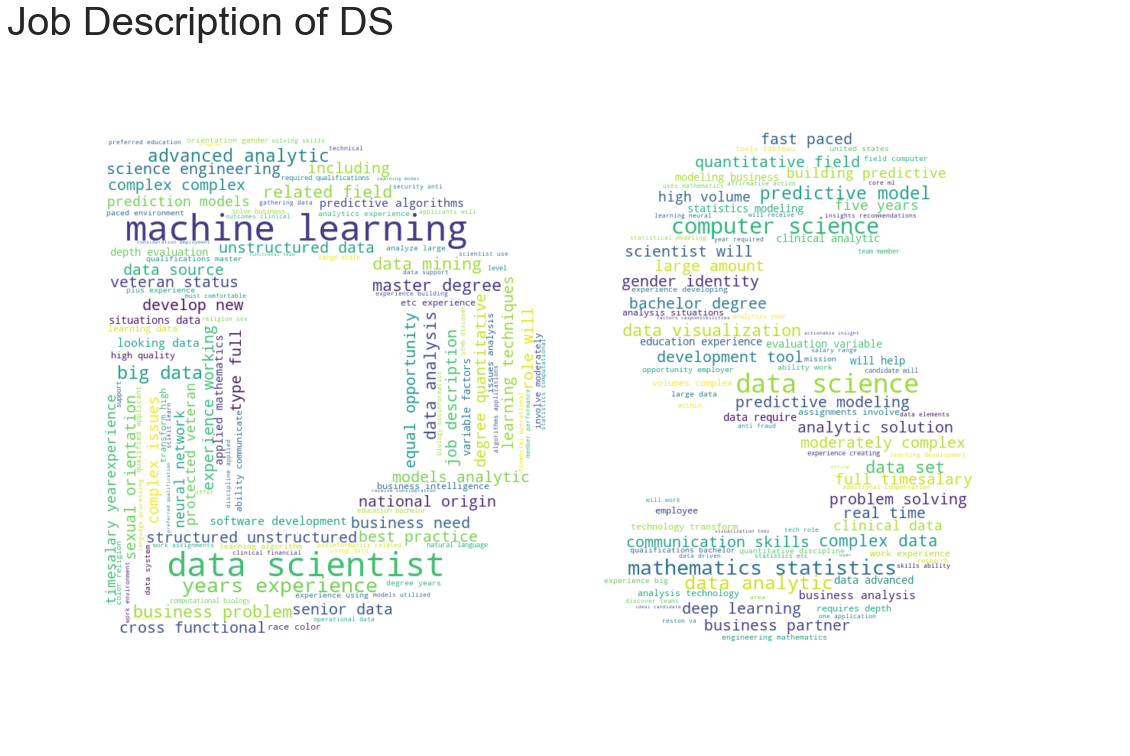

In [419]:
# When ploting the word cloud, the data we use should be in the list format
# So first, convert these string into list
Res_AN = ' '.join(Data['Description'].tolist())

# Define the size of the picture
sns.set(rc={'figure.figsize':(20,15)})
wordcloud = WordCloud(mask=ds_mask,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Job Description of DS',loc='left',size=40)
plt.show()

### · Degree requirement

In [372]:
degree_list = ['bachelor','mba','master','phd']

DataDegree = {}

for i in degree_list:
    counts = len(Data[Data['Description'].str.contains(i, case=False)])
    print(i,':',counts)
    DataDegree[i] = counts

bachelor : 575
mba : 18
master : 591
phd : 295


In [373]:
DataDegree = sorted(DataDegree.items(), key=lambda x: x[1], reverse=True)
DataDegree = pd.DataFrame(DataDegree,columns=['Degree','Counts'])
DataDegree

,Degree,Counts
0,master,591
1,bachelor,575
2,phd,295
3,mba,18


In [374]:
fig = px.pie(DataDegree, values='Counts', names='Degree',title='Distribution of Degree Requirment of DA',
             hover_name='Degree',color_discrete_sequence=px.colors.sequential.Sunset)
fig.update_traces(textinfo='label+value+percent')
fig.show()

### · Requirement of years of experience

<b>First, let's find out how many positions have a requirement of experience by counting how many cells contained the word 'experience'.

In [376]:
num = 0
for des in Data['Description']:
    des.find('experience')
    num += 1
    
print(num)

1310


<b>Then, we extract the the max number of experience in each cell. It may be several numbers in one cell, because they may have different requirement of years of experience.

In [412]:
import re
import statistics

# Find the max number of experience in each column, and the result will returns a list
Data['max_years_experience'] = Data['Description'].str.findall(r'([0-9]+) years of experience')
Data

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State,max_years_experience
0,Data Scientist,"Metron, Inc.","Reston, VA 20190 (Sunset Hills area)",NaN,As a Data Scientist you will be responsible fo...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job description:\nour advanced data analytics ...,None,VA,[]
1,Senior Data Scientist,TRANZACT,"Fort Lee, NJ 07024","$90,000 - $125,000 a year",Excellent understanding of machine learning te...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,how the position worksthe data scientist repor...,None,NJ,[5]
2,Data Scientist,ClearOne Advantage,"Baltimore, MD 21224 (Canton Industrial Area area)","$70,000 - $80,000 a year",We want to see a passion for machine-learning ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,**please only local candidates apply - thank y...,None,MD,[]
3,Machine Learning Engineer,Apple,"Seattle, WA",NaN,"In this highly collaborative role, you will be...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"summary\nposted: apr 22, 2020\nrole number:200...",None,WA,[]
4,Jr. Data Scientist | Development Team,DarkOwl,"Denver, CO",NaN,Work closely with our lead researchers to writ...,https://www.indeed.com/rc/clk?jk=24a7b392eb383...,what does a jr. data scientist do at darkowl?\...,None,CO,[]
...,...,...,...,...,...,...,...,...,...,...
1305,Senior Data Scientist,Humana,"Louisville, KY",NaN,Build smart systems that learn from health int...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,description\nthe senior data scientist uses ma...,None,KY,[]
1306,Data Scientist,Seen by Indeed,"Washington, DC",NaN,With one application you can be considered for...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,with one application you can be considered for...,None,DC,[]
1307,Data Scientist / Data Analytics,Tredence Inc.,"Seattle, WA","$100,000 - $130,000 a year",Data analytics: 3 years (Preferred).\nLead and...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"hi,hope you are doing well.**this is nasim sha...",None,WA,[]
1308,Clinical Data Scientist - Clinical Data Manage...,UTMB,"Galveston, TX 77550","$101,231 a year",Five years of clinical analytics experience in...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,min qualifications\n\neducation & experience\n...,None,TX,[]


<b>Then, calculate of the average number of year_experience in each cell. And change let those empty cells equal to 0.

In [413]:
# Calulate the average number of every cell
# For example, one job requirement is: 1-2 years of experience in python (max=2)
#                                      1-3 years of experience of SQL (max=3)
# We are going to calculate the average number of years in each requirement
# So the result should be like: 1 year of experience in python
#                               1.5 years of experience of SQL
# Then add these two numbers together and then calculate the mean again
# So the final result of this job required years of experience should be 1.25 years


for i in range(len(Data['max_years_experience'])):
    # The elements' type in each list is string, so we need to convert them into integer first
    Data['max_years_experience'][i] = map(int,Data['max_years_experience'][i])
    
    # Because the elements in the years_experience column are lists, not numbers, so we need to adjust the 
    # calculation order. 
    # We first calculate the average of the list, then divided them by 2.
    
    try:
        Data['max_years_experience'][i] = statistics.mean(Data['max_years_experience'][i])
    except:
        Data['max_years_experience'][i] = 0

Data['max_years_experience'] = Data['max_years_experience'].div(2)
Data

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State,max_years_experience
0,Data Scientist,"Metron, Inc.","Reston, VA 20190 (Sunset Hills area)",NaN,As a Data Scientist you will be responsible fo...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job description:\nour advanced data analytics ...,None,VA,0
1,Senior Data Scientist,TRANZACT,"Fort Lee, NJ 07024","$90,000 - $125,000 a year",Excellent understanding of machine learning te...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,how the position worksthe data scientist repor...,None,NJ,2.5
2,Data Scientist,ClearOne Advantage,"Baltimore, MD 21224 (Canton Industrial Area area)","$70,000 - $80,000 a year",We want to see a passion for machine-learning ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,**please only local candidates apply - thank y...,None,MD,0
3,Machine Learning Engineer,Apple,"Seattle, WA",NaN,"In this highly collaborative role, you will be...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"summary\nposted: apr 22, 2020\nrole number:200...",None,WA,0
4,Jr. Data Scientist | Development Team,DarkOwl,"Denver, CO",NaN,Work closely with our lead researchers to writ...,https://www.indeed.com/rc/clk?jk=24a7b392eb383...,what does a jr. data scientist do at darkowl?\...,None,CO,0
...,...,...,...,...,...,...,...,...,...,...
1305,Senior Data Scientist,Humana,"Louisville, KY",NaN,Build smart systems that learn from health int...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,description\nthe senior data scientist uses ma...,None,KY,0
1306,Data Scientist,Seen by Indeed,"Washington, DC",NaN,With one application you can be considered for...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,with one application you can be considered for...,None,DC,0
1307,Data Scientist / Data Analytics,Tredence Inc.,"Seattle, WA","$100,000 - $130,000 a year",Data analytics: 3 years (Preferred).\nLead and...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"hi,hope you are doing well.**this is nasim sha...",None,WA,0
1308,Clinical Data Scientist - Clinical Data Manage...,UTMB,"Galveston, TX 77550","$101,231 a year",Five years of clinical analytics experience in...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,min qualifications\n\neducation & experience\n...,None,TX,0


<b>Let's see how many positions have specific requirements of years of experience.

In [414]:
num = 0
for i in Data['max_years_experience']:
    if i != 0:
        num+=1
print('Numbers of companies have specific requirement to years of experience:',num)

Numbers of companies have specific requirement to years of experience: 114


<b>So we calculate the average of these valid cells and have a general understanding of years of experience.

In [415]:
import numpy as np

# Do the average calculation of cells which not equals to 0
# So convert those cell = 0 to NaN, then the calculation function will ignore them automaticlly

avgExpD = Data['max_years_experience'].replace(0, np.nan).mean()
print('Average number of years of experience required (max):',avgExpD)

Average number of years of experience required (max): 2.8362573099415203


## Analysis of Business Analyst/Intelligence

In [381]:
Business.describe()

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State
count,1289,1289,1289,355,1289,1289,1288,237,1289
unique,307,506,376,101,580,1160,567,23,44
top,Business Analyst,Shelter Insurance,"Columbia, MO","$43,735 - $63,677 a year",Collecting new business requests from stakehol...,"https://www.indeed.com/company/Amick-Brown,-LL...",a company built to serve you. it's your career...,Contract,NY
freq,267,80,81,80,39,3,40,77,167


In [382]:
Business.dtypes

Title          object
Company        object
Location       object
Salary         object
Summary        object
Link           object
Description    object
Job Type       object
State          object
dtype: object

### · Which companies have more demand for this position？

In [383]:
companyFreqB = Business['Company'].value_counts().reset_index()
companyFreqB.columns = ['Company','Counts']
companyFreqB[companyFreqB.Counts>=10]

,Company,Counts
0,Shelter Insurance,80
1,Southern Management Corporation,39
2,Piping Rock Health Products,39
3,Enovational,38
4,First Notch Technology,38
5,Cognosante,38
6,Tractor Supply Company,38
7,TDS,34
8,Refresco North America,31
9,"MasterBrand Cabinets, Inc.",30


### · What's the location distribution?

In [384]:
stateFreqB = Business['State'].value_counts().reset_index()
stateFreqB.columns = ['State','Counts']
stateFreqB

,State,Counts
0,NY,167
1,MO,120
2,CA,98
3,MD,58
4,TN,57
5,TX,57
6,DC,55
7,FL,55
8,NJ,47
9,SC,44


In [385]:
import plotly.express as px

fig = px.bar(stateFreqB, x='State', y='Counts',text='Counts',
             title='Location distribution of business analyst/intelligence positions',color='Counts',
             color_continuous_scale=px.colors.sequential.Sunset)
fig.update_traces(textposition='outside')
fig.show()

In [386]:
statelatlong['B'] = ''

for i in range(len(statelatlong)):
    for j in range(len(stateFreqB)):
        if stateFreqB['State'][j] == statelatlong['State'][i]:
            statelatlong['B'][i] = stateFreqB['Counts'][j]
        else:
            j += 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [388]:
statelatlong['B'] = statelatlong['B'].replace('', 0)
statelatlong

,State,Latitude,Longitude,City,D,B
0,AL,32.601011,-86.680736,Alabama,3,0
1,AK,61.302501,-158.775020,Alaska,0,0
2,AZ,34.168219,-111.930907,Arizona,2,12
3,AR,34.751928,-92.131378,Arkansas,0,3
4,CA,37.271875,-119.270415,California,231,98
5,CO,38.997934,-105.550567,Colorado,14,40
6,CT,41.518784,-72.757507,Connecticut,4,5
7,DE,39.145251,-75.418921,Delaware,1,2
8,DC,38.899349,-77.014567,District of Columbia,95,55
9,FL,27.975728,-83.833017,Florida,12,55


In [389]:
fig = px.choropleth(statelatlong, locations='State',locationmode = 'USA-states',
                    color="B",scope="usa",color_continuous_scale=px.colors.sequential.Purpor,
                    title='Distribution of numbers of BA/BI position on map')
fig.show()

### · Skills analysis - Which skills are monst required?

In [390]:
Business['Description'] = Business['Description'].fillna('None')

In [391]:
skills_list = ['r','python','sas','c\+\+','c[^+]','java','javascript','scala','linux','nosql','azure',
               '.net','matlab','sql','ai','nlp','deep learning','hadoop','excel','tableau','qlik',
               'spark','power bI','spss','google analytics','machine learning']

BusinessSkill = {}

for i in skills_list:
    counts = len(Business[Business['Description'].str.contains(i, case=False)])
    print(i,':',counts)
    BusinessSkill[i] = counts

r : 1288
python : 98
sas : 128
c\+\+ : 4
c[^+] : 1288
java : 52
javascript : 8
scala : 73
linux : 86
nosql : 33
azure : 55
.net : 258
matlab : 5
sql : 567
ai : 1219
nlp : 1
deep learning : 6
hadoop : 12
excel : 695
tableau : 289
qlik : 66
spark : 9
power bI : 185
spss : 9
google analytics : 10
machine learning : 33


In [392]:
BusinessSkill['c++'] = BusinessSkill.pop('c\\+\\+')
BusinessSkill['c'] = BusinessSkill.pop('c[^+]')
BusinessSkill = sorted(BusinessSkill.items(), key=lambda x: x[1], reverse=True)

In [393]:
BusinessSkill

[('r', 1288),
 ('c', 1288),
 ('ai', 1219),
 ('excel', 695),
 ('sql', 567),
 ('tableau', 289),
 ('.net', 258),
 ('power bI', 185),
 ('sas', 128),
 ('python', 98),
 ('linux', 86),
 ('scala', 73),
 ('qlik', 66),
 ('azure', 55),
 ('java', 52),
 ('nosql', 33),
 ('machine learning', 33),
 ('hadoop', 12),
 ('google analytics', 10),
 ('spark', 9),
 ('spss', 9),
 ('javascript', 8),
 ('deep learning', 6),
 ('matlab', 5),
 ('c++', 4),
 ('nlp', 1)]

In [394]:
BusinessSkill = pd.DataFrame(BusinessSkill,columns=['Skill','Counts'])
BusinessSkill

,Skill,Counts
0,r,1288
1,c,1288
2,ai,1219
3,excel,695
4,sql,567
5,tableau,289
6,.net,258
7,power bI,185
8,sas,128
9,python,98


In [395]:
fig = px.bar(BusinessSkill, x='Skill', y='Counts',text='Counts',title='Skill Distribution of BA/BI',
            color='Counts',color_continuous_scale=px.colors.sequential.Sunset)
fig.update_traces(textposition='outside')
fig.show()

### · Make the job description word cloud - Find out what other analysis can we make.

In [403]:
ba_mask = np.array(Image.open( "BA.png"))

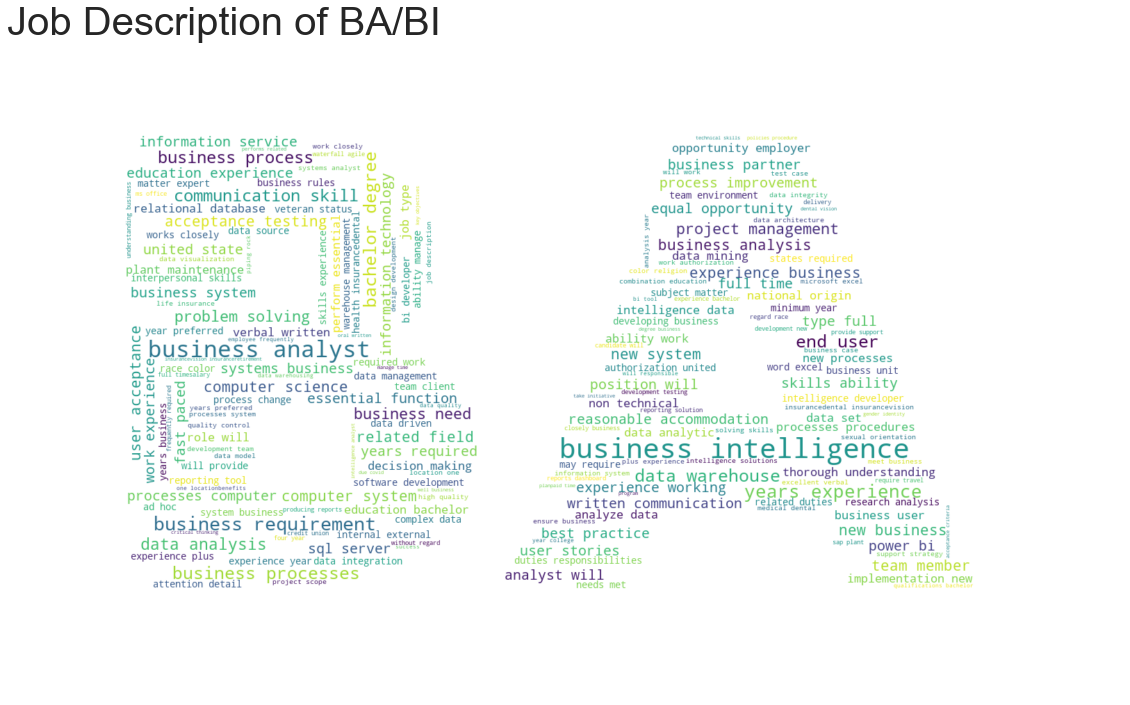

In [405]:
Res_AN = ' '.join(Business['Description'].tolist())

sns.set(rc={'figure.figsize':(20,15)})
wordcloud = WordCloud(mask=ba_mask,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Job Description of BA/BI',loc='left',size=40)
plt.show()

### · Degree requirement

In [406]:
degree_list = ['bachelor','mba','master','phd']

BusinessDegree = {}

for i in degree_list:
    counts = len(Business[Business['Description'].str.contains(i, case=False)])
    print(i,':',counts)
    BusinessDegree[i] = counts

bachelor : 717
mba : 31
master : 291
phd : 10


In [407]:
BusinessDegree = sorted(BusinessDegree.items(), key=lambda x: x[1], reverse=True)
BusinessDegree = pd.DataFrame(BusinessDegree,columns=['Degree','Counts'])
BusinessDegree

,Degree,Counts
0,bachelor,717
1,master,291
2,mba,31
3,phd,10


In [408]:
fig = px.pie(BusinessDegree, values='Counts', names='Degree',title='Distribution of Degree Requirment of BA/BI',
             hover_name='Degree',color_discrete_sequence=px.colors.sequential.Sunset)
fig.update_traces(textinfo='label+value+percent')
fig.show()

### · Requirement of years of experience

In [409]:
num = 0
for des in Business['Description']:
    des.find('experience')
    num += 1
    
print(num)

1289


In [411]:
# Find the max number of experience in each column, and the result will returns a list
Business['max_years_experience'] = Business['Description'].str.findall(r'([0-9]+) years of experience')
Business

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State,max_years_experience
0,Manager of Business Intelligence,Kansas City Southern Railway,"Kansas City, MO",NaN,Establishes and maintains communication with b...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job summary:\n\nthe primary responsibility of ...,NaN,MO,[]
1,Business Intelligence Developer,APG Federal Credit Union,"Edgewood, MD",NaN,"Designing, developing and maintaining business...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,apgfcu – your community credit union! for over...,NaN,MD,[6]
2,Business Intelligence Developer,Jobot,"Greenwood Village, CO","$90,000 - $115,000 a year",Competitive base salary between $90k and $110k...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,established regional real estate leader seeks ...,NaN,CO,[]
3,Business Intelligence and Commissions Speciali...,Isagenix,"Gilbert, AZ 85297",NaN,Work with business owners to interpret data an...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position summary:\nthe specialist manages supp...,NaN,AZ,[7]
4,Business Intelligence Developer,"MasterBrand Cabinets, Inc.","Jasper, IN 47546",NaN,Identify recommend and prioritize new business...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position profile:\nposition summary\nthis is a...,NaN,IN,[]
...,...,...,...,...,...,...,...,...,...,...
1284,Credit Data Business Analyst,Southern Management Corporation,"Greenville, SC 29601",NaN,The Credit Data Business Analyst at Southern M...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,overview:\nsummary:\nthe credit data business ...,NaN,SC,[]
1285,Business Analyst,Enovational,"Washington, DC 20005 (Downtown area)","$60,000 - $130,000 a year",Our ideal candidate is has earned a bachelor’s...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,enovational corp is a fast growing technology ...,NaN,DC,[5]
1286,Jr. Business Analyst,First Notch Technology,"Nyack, NY","$50,000 - $60,000 a year",As a Business Analyst based in Halifax you are...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,roleas a business analyst based in halifax you...,"- Part-time, Contract",NY,[]
1287,Business Analyst,Cognosante,"Fargo, ND 58103 (Village West area)",NaN,The Business Analyst will be a part of a team ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,the business analyst will be a part of a team ...,NaN,ND,[]


In [416]:
for i in range(len(Business['max_years_experience'])):
    # The elements' type in each list is string, so we need to convert them into integer first
    Business['max_years_experience'][i] = map(int,Business['max_years_experience'][i])
    
    # Because the elements in the years_experience column are lists, not numbers, so we need to adjust the 
    # calculation order. 
    # We first calculate the average of the list, then divided them by 2.
    
    try:
        Business['max_years_experience'][i] = statistics.mean(Business['max_years_experience'][i])
    except:
        Business['max_years_experience'][i] = 0

Business['max_years_experience'] = Business['max_years_experience'].div(2)
Business

,Title,Company,Location,Salary,Summary,Link,Description,Job Type,State,max_years_experience
0,Manager of Business Intelligence,Kansas City Southern Railway,"Kansas City, MO",NaN,Establishes and maintains communication with b...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job summary:\n\nthe primary responsibility of ...,NaN,MO,0
1,Business Intelligence Developer,APG Federal Credit Union,"Edgewood, MD",NaN,"Designing, developing and maintaining business...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,apgfcu – your community credit union! for over...,NaN,MD,3
2,Business Intelligence Developer,Jobot,"Greenwood Village, CO","$90,000 - $115,000 a year",Competitive base salary between $90k and $110k...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,established regional real estate leader seeks ...,NaN,CO,0
3,Business Intelligence and Commissions Speciali...,Isagenix,"Gilbert, AZ 85297",NaN,Work with business owners to interpret data an...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position summary:\nthe specialist manages supp...,NaN,AZ,3.5
4,Business Intelligence Developer,"MasterBrand Cabinets, Inc.","Jasper, IN 47546",NaN,Identify recommend and prioritize new business...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position profile:\nposition summary\nthis is a...,NaN,IN,0
...,...,...,...,...,...,...,...,...,...,...
1284,Credit Data Business Analyst,Southern Management Corporation,"Greenville, SC 29601",NaN,The Credit Data Business Analyst at Southern M...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,overview:\nsummary:\nthe credit data business ...,NaN,SC,0
1285,Business Analyst,Enovational,"Washington, DC 20005 (Downtown area)","$60,000 - $130,000 a year",Our ideal candidate is has earned a bachelor’s...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,enovational corp is a fast growing technology ...,NaN,DC,2.5
1286,Jr. Business Analyst,First Notch Technology,"Nyack, NY","$50,000 - $60,000 a year",As a Business Analyst based in Halifax you are...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,roleas a business analyst based in halifax you...,"- Part-time, Contract",NY,0
1287,Business Analyst,Cognosante,"Fargo, ND 58103 (Village West area)",NaN,The Business Analyst will be a part of a team ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,the business analyst will be a part of a team ...,NaN,ND,0


In [417]:
num = 0
for i in Business['max_years_experience']:
    if i != 0:
        num+=1
print('Numbers of companies have specific requirement to years of experience:',num)

Numbers of companies have specific requirement to years of experience: 179


In [418]:
# Do the average calculation of cells which not equals to 0
# So convert those cell = 0 to NaN, then the calculation function will ignore them automaticlly

avgExpD = Business['max_years_experience'].replace(0, np.nan).mean()
print('Average number of years of experience required (max):',avgExpD)

Average number of years of experience required (max): 2.555167597765363
